# Ch. 17: Decision Trees
Notes on "Data Science from Scratch" by Joel Grus

In [13]:
import math
from collections import Counter

import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

## What Is a Decision Tree?
- uses a tree structure to represent a number of possible *decision paths* and an outcome for each path
- easy to understand and interpret, and the process by which they reach a prediction is transparent
- can easily handle a mix of numeric and categorical attributes
- can classify data for which attributes are missing
- finding an "optimal" tree for a set of training data is computationally a very hard problem
- it's very easy (and bad) to build decision trees that are *overfitted* to the training data (that don't generalize well to unseen daya)

Can be divided into two types:
- *classification trees* - produce categorical outputs
- *regression trees* - produce numeric outputs

Specifically, we'll look at the **ID3 algorithm** for learning a decision tree from a set of labeled data and restrict ourselves to binary outputs (e.g., Yes/No) instead of 3 or more (e.g., Yes/Maybe/No).

## Entropy
To build a decision tree we need to decide what questions to ask and in what order.

We want to choose questions whose answers give a lot of information about what our tree should predict.  We capture "how much information" with *entropy*, or amount of uncertainty associated with data.  

Imagine we have a set $S$ of data, each member of which is labeled as belonging to one of a finite number of classes $C_1, ..., C_n$. 
- If all the data points belong to a single class then entropy (amount of uncertainty) should be low.
- If the data points are evenly spread across the class then entropy should be high.

Let $p_i$ be the proportion of data labeled as class $c_i$.  Entropy is defined as:
$$H(S) = -p_1 \log_2 p_1 - ... - p_n \log_2 p_n$$

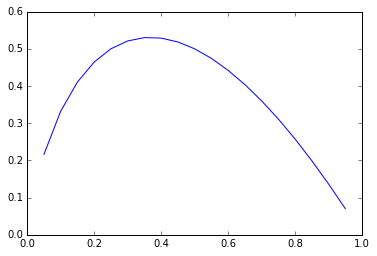

In [11]:
xs = np.arange(0.05, 1.0, 0.05)
ys = -xs * np.log2(xs)
mpl.plot(xs, ys)

From the graph we see that the entropy would be very small when every $p_i$ is close to $0$ or $1$ (when most of the data is in a single class) and would be larger when many of the $p_i$'s are not close to $0$ or $1$ (when data is spread across multiple classes.

In [14]:
def entropy(class_probabilities):
    """Give a list of class probabilities, compute the entropy."""
    return sum(-p * math.log(p, 2)
               for p in class_probabilitiers
               if p) # ignore zero probabilities

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count
           for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

## The Entropy of a Partitition
The stuff above computes the entropy ("uncertainty") of a single set of labeled data.  Now we want to get an idea of the entropy that results from partitioning a set of data in a certain way.  We want the partition to have low entropy if it splits the data into subsets that themselves have low entropy (high certainty), and high entropy if it contains subsets that have high entropy (low certainty).

If we partition our data $S$ into subsets $S_1, ..., S_m$ containing proportions $q_1, ..., q_m$ of the data, the the entropy of partition is the weighted sum:
$$H = q_1 H(S_1) + ... + q_m H(S_m)$$

In [15]:
def partition_entropy(subsets):
    """Find the entropy from this partition of data into subsets.
    Subsets is a list of lists of labeled data."""
    
    total_count = sum(len(subset) for subset in subsets)
    
    return sum( data_entropy(subset) * len(subset) / total_count
              for subset in subsets )

In [22]:
- 1.0 * np.log2(1.0)

-0.0

## Creating a Decision Tree


In [16]:
inputs = [
    ({'level':'Senior', 'lang':'Java', 'tweets':'no', 'phd':'no'},   False),
    ({'level':'Senior', 'lang':'Java', 'tweets':'no', 'phd':'yse'},   False),
    ({'level':'Mid', 'lang':'Python', 'tweets':'no', 'phd':'no'},   True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'no', 'phd':'no'},   True),
]

### ID3 Algorithm
- If the data all have the same label, then create a leaf node that predicts that label and then stop.
- If the list of attributes is empty (i.e., there are no more possible questions to ask), then create a leaf node that predicts the most common label and then stop.
- Otherwise, try partitioning the data by each of the attributes.
- Choose the partition with the lowest partition entropy.
- Add a decision node based on the chosed attribute.
- Recur on each partitioned subset using the remaining attributes.

This is known as a "greedy" algorithm because at each step it chooses the most immediately best option.  Give a data set, there may be a better tree with a worse-looking first move.  If so, this algorithm won't find it.